In [71]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [74]:
df.shape

(20800, 5)

In [75]:
# counting the number of missing values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [76]:
# replacing the null values with empty string
df = df.fillna('')

In [77]:
# checking the number of missing values in the dataset
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [78]:
# merging the author name and news title
df['content'] = df['author']+' '+df['title']

In [79]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [80]:
# separating the data & label
X = df.drop(columns='label', axis=1)
#hold label to y
y = df['label']
#separating the data and label
X = df['content'].values


In [81]:
y.value_counts()


label
1    10413
0    10387
Name: count, dtype: int64

In [82]:
X.shape

(20800,)

In [83]:
y.shape

(20800,)

In [84]:
print(y)


0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [85]:
port_stem = PorterStemmer()

In [86]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review


In [105]:
df['content'] = df['content'].apply(stemming)

In [88]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [89]:
print(X)

  (0, 23355)	0.18006497451107856
  (0, 22649)	0.26575278886038384
  (0, 22289)	0.3484071341454308
  (0, 19171)	0.22537992364975484
  (0, 12902)	0.3024224900242886
  (0, 12528)	0.24883399099107747
  (0, 11409)	0.20615188166061463
  (0, 11307)	0.1532265401605094
  (0, 10387)	0.1844880289323935
  (0, 7574)	0.23047267305353566
  (0, 6145)	0.24677171892553343
  (0, 5800)	0.2502787762405247
  (0, 5508)	0.2993429551929777
  (0, 4507)	0.20531415441295317
  (0, 3862)	0.30579573877221844
  (0, 904)	0.26354004814013343
  (1, 23748)	0.2966210296019264
  (1, 15149)	0.15862263711495958
  (1, 10134)	0.18787145765749733
  (1, 8420)	0.7045992054867243
  (1, 5469)	0.2624012615566619
  (1, 4298)	0.19024289659874757
  (1, 3509)	0.37751839443307017
  (1, 3075)	0.15310531118537438
  (1, 2544)	0.2899843833664323
  :	:
  (20797, 11262)	0.12516633187998083
  (20797, 10427)	0.20792477683235197
  (20797, 5559)	0.20389975589596085
  (20797, 3394)	0.14456424605079038
  (20797, 2273)	0.31989436828531154
  (20797, 1

In [90]:
import pickle as pkl
with open('TfidfVectorizer.pkl','wb') as files:
    pkl.dump(vectorizer,files)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [92]:
#Importing MultinomialNB module from sklearn
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [93]:
from sklearn import metrics
import itertools

In [94]:
#Training the model for training data
classifier.fit(X_train, y_train)
import pickle as pkl 

with open('model.pkl','wb') as file:
    pkl.dump(classifier,file)


In [95]:
pred1 = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred1)

In [96]:
print("accuracy: %0.3f" % score)

accuracy: 0.947


In [97]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


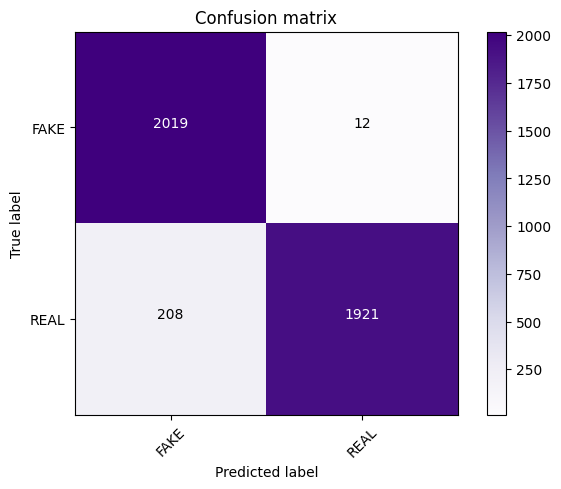

In [98]:
cm1 = metrics.confusion_matrix(y_test, pred1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [99]:
# Generate the classification report
report = classification_report(y_test,pred1)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2031
           1       0.99      0.90      0.95      2129

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



In [100]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =classifier , X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.24 %
Standard Deviation: 0.42 %


In [101]:
#mean absolute error of mnb
#mean squared error
#root mean square error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

Mean Absolute Error: 0.052884615384615384
Mean Squared Error: 0.052884615384615384
Root Mean Squared Error: 0.22996655275194997


In [102]:
#reading the saved model
import pickle as pkl 

with open('model.pkl','rb') as file:
    model = pkl.load(file)

In [103]:
# test with saved vectoriser

import pickle as pkl
with open('TfidfVectorizer.pkl','rb') as file:
    vectorizer = pkl.load(file)

In [112]:
new_test = ['Actor and model Saruk Tamrakar untimely demise continues to reverberate through the entertainment industry, with nine days having passed since his tragic death on July 6']
r = vectorizer.transform(new_test)
res = model.predict(r)

if res == 0:
    print("The news headline is fake")
else:
    print("The news headline is real")

The news headline is real


1: Unreliable
0: Reliable
Distribution of labels:
label
1    10413
0    10387
Name: count, dtype: int64


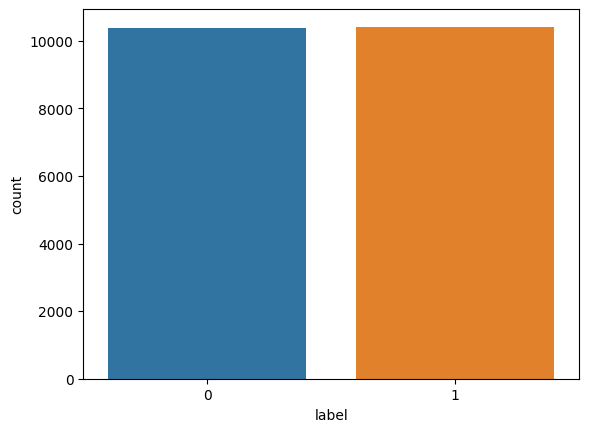

In [121]:
import seaborn as sns
sns.countplot(x="label", data=df);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(df.label.value_counts());

In [133]:
X_new = X_test[10] #keep changing the integer to see if your model predicts correct

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake
